In [2]:
import seaborn as sns
df = sns.load_dataset("titanic")
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Encode categorical
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['embarked'] = df['embarked'].map({'S':0, 'C':1, 'Q':2})

# Fill missing values with most frequent value (mode)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

print(df[['sex','embarked']].head(10))


   sex  embarked
0    0       0.0
1    1       1.0
2    1       0.0
3    1       0.0
4    0       0.0
5    0       2.0
6    0       0.0
7    0       0.0
8    1       0.0
9    1       1.0


C:\Users\priya\AppData\Local\Temp\ipykernel_11668\2405005597.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_11668\2405005597.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [4]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


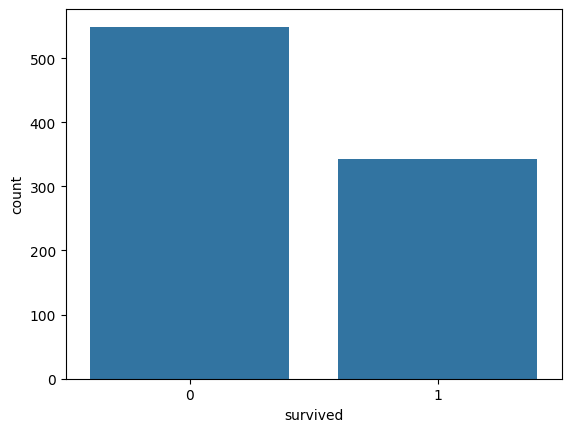

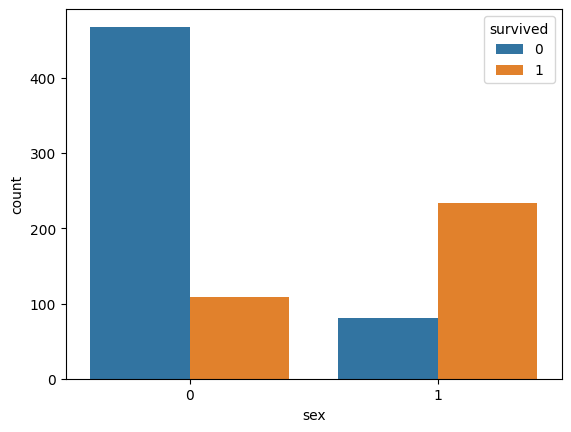

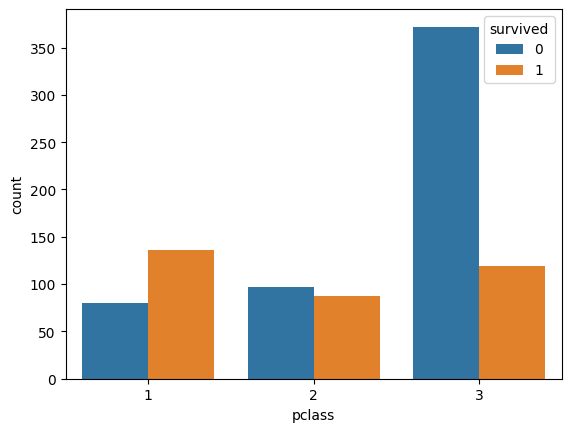

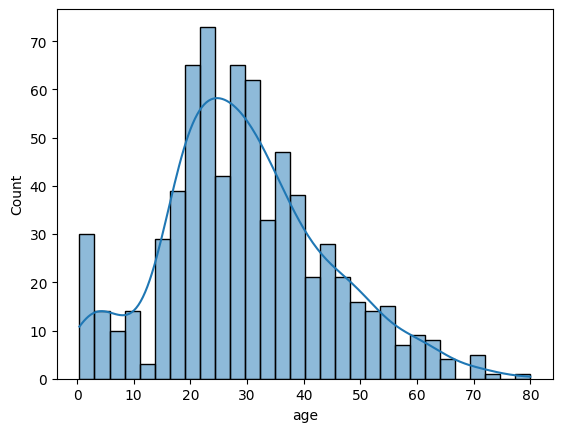

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Survived ka countplot
sns.countplot(x='survived', data=df)
plt.show()

# 2. Sex aur survived relation
sns.countplot(x='sex', hue='survived', data=df)
plt.show()

# 3. Pclass aur survived relation
sns.countplot(x='pclass', hue='survived', data=df)
plt.show()

# 4. Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Features aur target alag karo
X = df[['pclass','sex','age','sibsp','parch','fare','embarked']]
y = df['survived']

# Age ke missing values ko fill kar do (mean se)
X['age'] = X['age'].fillna(X['age'].mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\priya\AppData\Local\Temp\ipykernel_11668\1128183241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())


In [7]:

# Age ke missing values ko fill karna without warning
X.loc[:, 'age'] = X['age'].fillna(X['age'].mean())


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7988826815642458


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7932960893854749


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8324022346368715


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediction
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


NameError: name 'model' is not defined

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features aur target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

# Missing values handle karna
X['age'] = X['age'].fillna(X['age'].mean())
X['fare'] = X['fare'].fillna(X['fare'].mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


C:\Users\priya\AppData\Local\Temp\ipykernel_11668\2250625234.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())
C:\Users\priya\AppData\Local\Temp\ipykernel_11668\2250625234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fare'] = X['fare'].fillna(X['fare'].mean())


LogisticRegression(max_iter=200)

In [13]:
# Features aur target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()  # <-- copy() add karo
y = df['survived']

# Missing values handle karna (safe way)
X.loc[:, 'age'] = X['age'].fillna(X['age'].mean())
X.loc[:, 'fare'] = X['fare'].fillna(X['fare'].mean())


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict karo
y_pred = model.predict(X_test)

# Accuracy check
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Decision Tree Accuracy: 0.776536312849162
Random Forest Accuracy: 0.8212290502793296


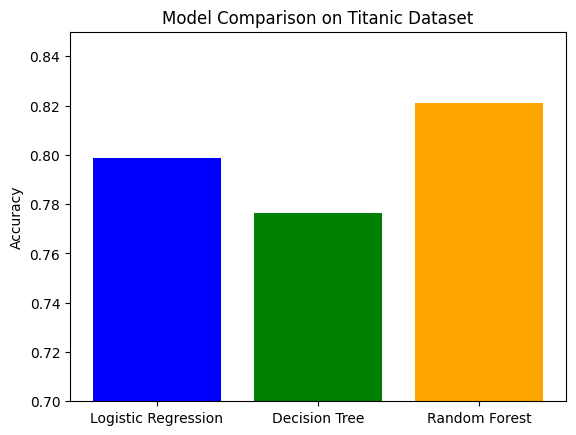

In [16]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.7988, 0.7765, 0.8212]

plt.bar(models, accuracy, color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison on Titanic Dataset")
plt.ylim(0.7, 0.85)
plt.show()


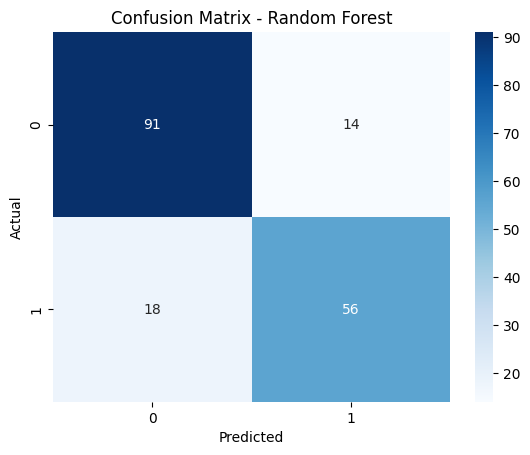

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
